In [2]:
import pandas as pd
from google.colab import files




In [3]:
# Upload the CSV file
uploaded = files.upload()

Saving Violent crime in CA Raw Data Edited.csv to Violent crime in CA Raw Data Edited.csv


In [4]:
# Try loading with ISO-8859-1 (Latin-1) encoding
df = pd.read_csv('Violent crime in CA Raw Data Edited.csv', encoding='ISO-8859-1')


<ipython-input-4-18e8c5eee6dc>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Violent crime in CA Raw Data Edited.csv', encoding='ISO-8859-1')


In [5]:
# Show basic info
print("Initial shape:", df.shape)
print("Missing values:\n", df.isnull().sum())


Initial shape: (49227, 27)
Missing values:
 ind_id (Indicator ID)                                                                   0
ind_definition                                                                          1
reportyear                                                                              1
race_eth_code(numeric code for a race/ethnicity group)                                  1
race_eth_name (Name of race/ethnic group)                                               1
geotype(Type of geographic unit)                                                        1
geotypevalue(Value of geographic unit)                                                  1
geoname(Name of geographic unit)                                                        1
county_fips(Name of county that geotype is in)                                       1051
county_name(FIPS code of county that geotype is in)                                  1051
region_code(MPO-based region name)                      

In [6]:
# Drop completely empty columns
df = df.dropna(axis=1, how='all')

In [7]:
# Fill numeric NaNs with 0
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(0)

In [8]:
# Strip column names
df.columns = df.columns.str.strip()


In [9]:
# Remove duplicates
df = df.drop_duplicates()

In [10]:
# Show summary
print("Cleaned shape:", df.shape)

Cleaned shape: (49227, 27)


In [11]:
# Save and download cleaned data
df.to_csv('cleaned_crime_data.csv', index=False)
files.download('cleaned_crime_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load cleaned data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('cleaned_crime_data.csv')

Saving cleaned_crime_data.csv to cleaned_crime_data (1).csv


<ipython-input-13-cc9900e105e0>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_crime_data.csv')


In [14]:
# Basic structure
print("Data shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nSummary Stats:\n", df.describe(include='all'))

Data shape: (49227, 27)

Columns:
 ['ind_id (Indicator ID)', 'ind_definition', 'reportyear', 'race_eth_code(numeric code for a race/ethnicity group)', 'race_eth_name (Name of race/ethnic group)', 'geotype(Type of geographic unit)', 'geotypevalue(Value of geographic unit)', 'geoname(Name of geographic unit)', 'county_fips(Name of county that geotype is in)', 'county_name(FIPS code of county that geotype is in)', 'region_code(MPO-based region name)', 'region_name(MPO-based region code)', 'strata_name_code(Code for the strata)', 'strata_name', 'strata_level_name_code(Code for the strata levels)', 'strata_level_name', 'numerator(Number of crimes by type of crime)', 'denominator(Total population as reported by the Federal Bureau of Investigation)', 'rate(Number of violent crimes per 1,000 population)', 'll_95ci(Lower limit of 95% confidence interval)', 'ul_95ci(Upper limit of 95% confidence interval)', 'se(Standard error of the rate)', 'rse(Relative standard error (se/percent * 100) express

In [15]:
# --------------------------
# Trend of violent crimes over years
# --------------------------
if 'Year' in df.columns:
    plt.figure(figsize=(12, 6))
    df.groupby('Year').sum(numeric_only=True).plot(kind='line', marker='o')
    plt.title('Violent Crime Trend Over Time (Statewide)')
    plt.ylabel('Number of Crimes')
    plt.xlabel('Year')
    plt.grid(True)
    plt.show()


In [16]:
# --------------------------
# Crime distribution by county
# --------------------------
if 'County' in df.columns:
    county_totals = df.groupby('County').sum(numeric_only=True).sum(axis=1).sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    county_totals.plot(kind='bar')
    plt.title('Total Violent Crimes by County (2000–2013)')
    plt.ylabel('Total Crimes')
    plt.xlabel('County')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

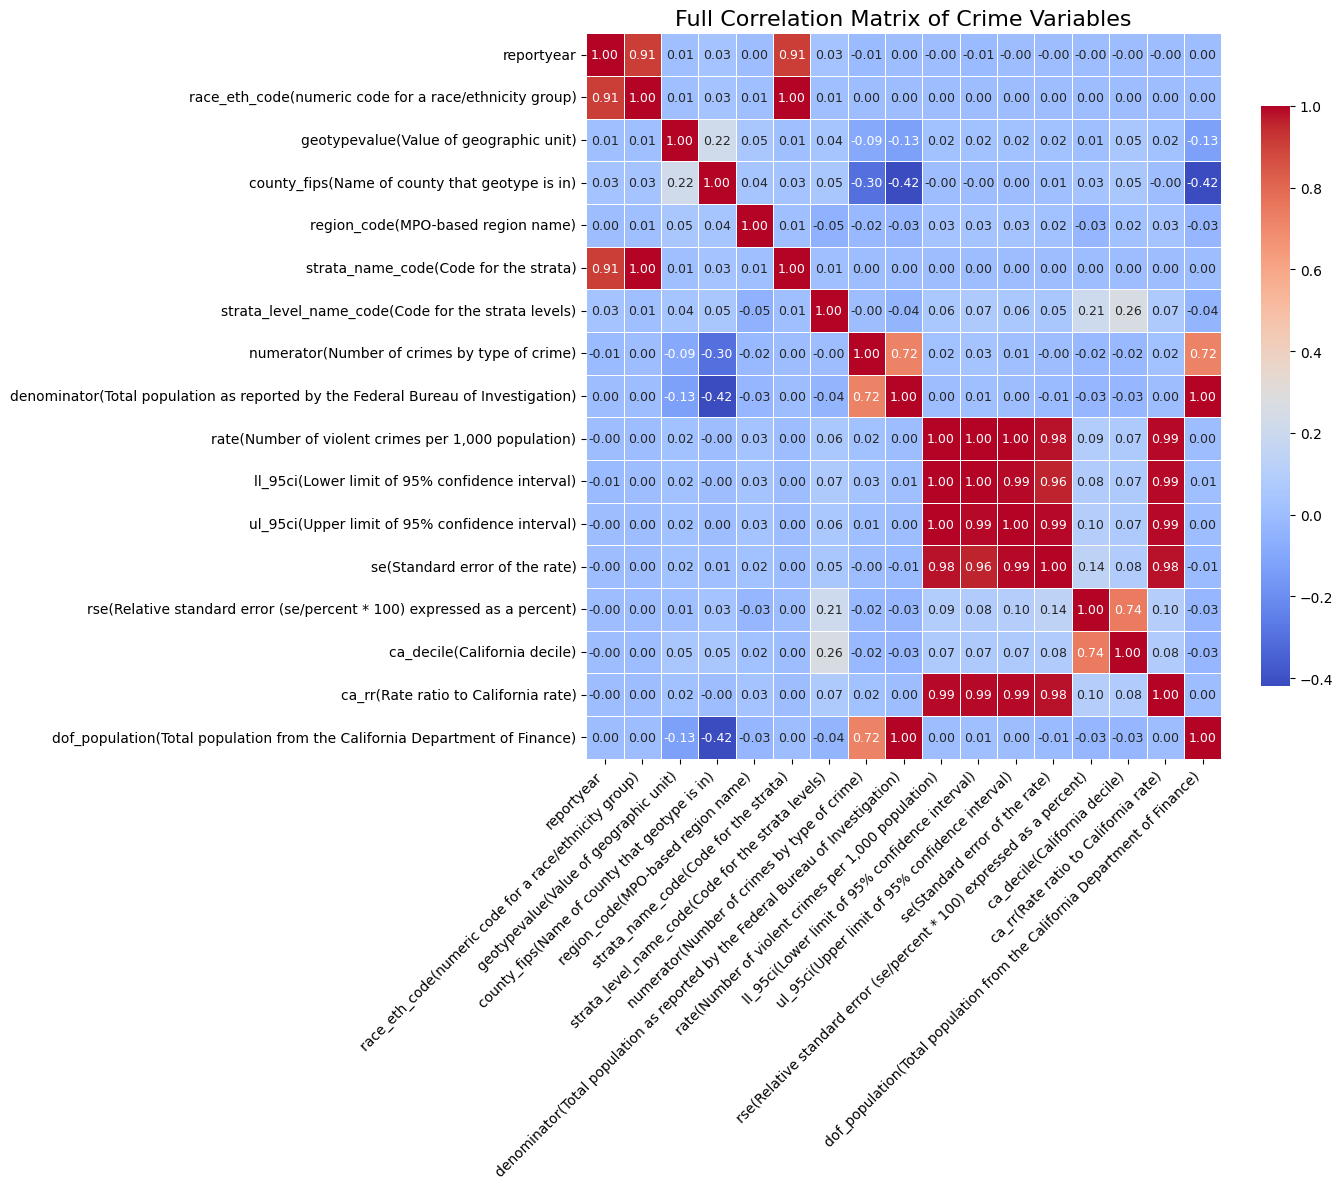

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
crime_corr = df.select_dtypes(include='number').corr()

# Plot full heatmap with all correlation values
plt.figure(figsize=(14, 12))
sns.heatmap(
    crime_corr.round(2),  # show numbers rounded to 2 decimal places
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title('Full Correlation Matrix of Crime Variables', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [18]:
# --------------------------
# Distribution of a specific crime type (e.g. Homicide)
# --------------------------
if 'Homicide' in df.columns:
    sns.histplot(df['Homicide'], bins=30, kde=True)
    plt.title('Distribution of Homicide Incidents')
    plt.xlabel('Number of Homicides')
    plt.show()

# Predictive Modeling - Prophet

In [19]:
# 📦 Install Prophet
!pip install prophet --quiet

In [20]:
# 📊 Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import files

In [21]:
# 📂 Upload CSV
uploaded = files.upload()

Saving cleaned_crime_data.csv to cleaned_crime_data (2).csv


In [22]:
# Replace with your actual file name
df = pd.read_csv("Violent crime in CA Raw Data Edited.csv", encoding='ISO-8859-1')
df.columns = df.columns.str.strip()


<ipython-input-22-a08b22c20869>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Violent crime in CA Raw Data Edited.csv", encoding='ISO-8859-1')


In [23]:
# 🔍 Select & clean violent crime total
df.rename(columns={
    'reportyear': 'year',
    'strata_level_name': 'crime_type',
    'numerator(Number of crimes by type of crime)': 'crime_count'
}, inplace=True)

df_total = df[df['crime_type'] == 'Violent crime total'].copy()
df_total = df_total.dropna(subset=['year', 'crime_count'])
df_total['year'] = pd.to_numeric(df_total['year'], errors='coerce')
df_total = df_total.groupby('year')['crime_count'].sum().reset_index()
df_total['year'] = df_total['year'].astype(int)

In [24]:
# 🔁 Prophet format
df_prophet = df_total.rename(columns={'year': 'ds', 'crime_count': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

In [25]:
# 🔮 Prophet model
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp_00pud/wi2l3eee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp_00pud/wks4kwyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92909', 'data', 'file=/tmp/tmpnp_00pud/wi2l3eee.json', 'init=/tmp/tmpnp_00pud/wks4kwyk.json', 'output', 'file=/tmp/tmpnp_00pud/prophet_modeld9kqb7ek/prophet_model-20250329193134.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:31:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:31:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:

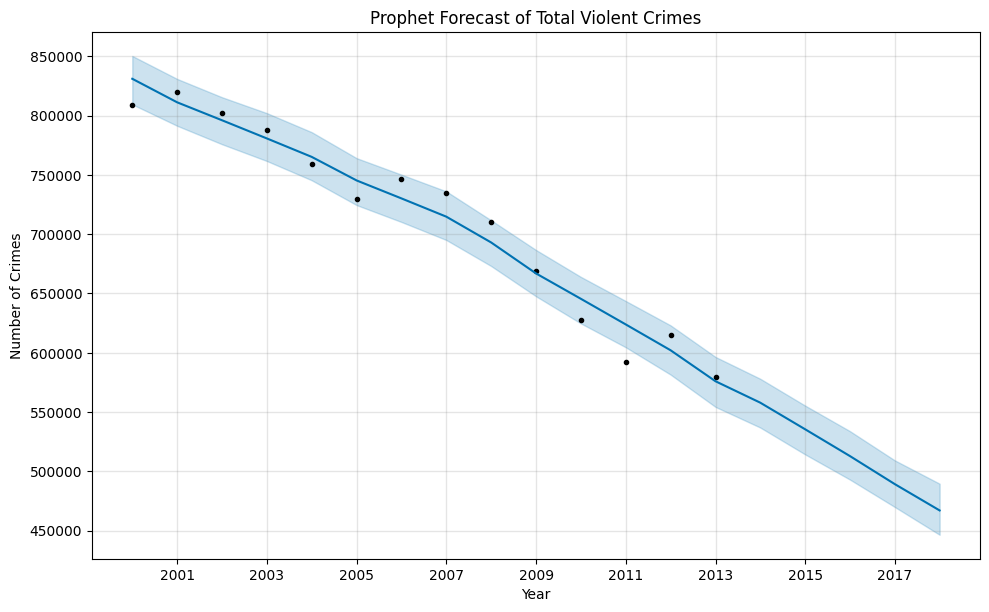

In [26]:
# 📈 Plot forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast of Total Violent Crimes")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()


# Geographic Analysis

In [27]:
# Show sample county values to match with MPO region mapping
df[['county_fips(Name of county that geotype is in)', 'county_name(FIPS code of county that geotype is in)']].drop_duplicates().head(10)


,county_fips(Name of county that geotype is in),county_name(FIPS code of county that geotype is in)
0,NaN,NaN
5,6001.0,Alameda
10,6003.0,Alpine
15,6005.0,Amador
20,6007.0,Butte
25,6009.0,Calaveras
30,6011.0,Colusa
35,6013.0,Contra Costa
40,6015.0,Del Norte
45,6017.0,El Dorado


In [28]:
df['county_name(FIPS code of county that geotype is in)']


,county_name(FIPS code of county that geotype is in)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
49222,NaN
49223,NaN
49224,NaN
49225,NaN


In [29]:
# Example: show unique county names
df['county_name(FIPS code of county that geotype is in)'].unique()


array([nan, 'Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [30]:
# Example: filter only rows from Alameda
df[df['county_name(FIPS code of county that geotype is in)'] == 'Alameda']


,ind_id (Indicator ID),ind_definition,year,race_eth_code(numeric code for a race/ethnicity group),race_eth_name (Name of race/ethnic group),geotype(Type of geographic unit),geotypevalue(Value of geographic unit),geoname(Name of geographic unit),county_fips(Name of county that geotype is in),county_name(FIPS code of county that geotype is in),...,denominator(Total population as reported by the Federal Bureau of Investigation),"rate(Number of violent crimes per 1,000 population)",ll_95ci(Lower limit of 95% confidence interval),ul_95ci(Upper limit of 95% confidence interval),se(Standard error of the rate),rse(Relative standard error (se/percent * 100) expressed as a percent),ca_decile(California decile),ca_rr(Rate ratio to California rate),dof_population(Total population from the California Department of Finance),version(Date/time stamp of version of data)
5,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
6,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
7,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
8,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
9,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,6.582206,6.449864,6.714547,0.067521,1.025816,NaN,1.058658,1443939.0,10/21/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48885,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,81204.0,Union City city,6001.0,Alameda,...,72480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71843.0,10/21/2015
48886,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,81204.0,Union City city,6001.0,Alameda,...,72480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71843.0,10/21/2015
48887,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,81204.0,Union City city,6001.0,Alameda,...,72480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71843.0,10/21/2015
48888,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,81204.0,Union City city,6001.0,Alameda,...,72480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71843.0,10/21/2015


Choropleth Map of crime rate (or count) by county using Folium

In [31]:
# Use a better-known static source
!wget https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson -O california_counties.geojson


--2025-03-29 19:31:36--  https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416370 (407K) [text/plain]
Saving to: ‘california_counties.geojson’

california_counties 100%[===================>] 406.61K  --.-KB/s    in 0.06s   

2025-03-29 19:31:36 (6.15 MB/s) - ‘california_counties.geojson’ saved [416370/416370]



In [32]:
import geopandas as gpd

# Load California counties shapefile
gdf_ca = gpd.read_file("california_counties.geojson")

# Preview column names and a few rows
gdf_ca.columns, gdf_ca.head()


(Index(['name', 'cartodb_id', 'created_at', 'updated_at', 'geometry'], dtype='object'),
         name  cartodb_id                created_at                updated_at  \
 0    Alameda           1 2015-07-04 21:04:58+00:00 2015-07-04 21:04:58+00:00   
 1     Alpine           2 2015-07-04 21:04:58+00:00 2015-07-04 21:04:58+00:00   
 2     Amador           3 2015-07-04 21:04:58+00:00 2015-07-04 21:04:58+00:00   
 3      Butte           4 2015-07-04 21:04:58+00:00 2015-07-04 21:04:58+00:00   
 4  Calaveras           5 2015-07-04 21:04:58+00:00 2015-07-04 21:04:58+00:00   
 
                                             geometry  
 0  MULTIPOLYGON (((-122.31293 37.89733, -122.2884...  
 1  POLYGON ((-120.07239 38.70277, -119.96495 38.7...  
 2  POLYGON ((-121.02726 38.48925, -121.02741 38.5...  
 3  POLYGON ((-121.87925 39.30361, -121.90831 39.3...  
 4  POLYGON ((-120.87605 38.02889, -120.91875 38.0...  )

In [33]:
# Recreate MPO mapping manually based on the PDF content
mpo_data = [
    ['06001', 'Alameda', 'Bay Area', 1],
    ['06003', 'Alpine', 'Central/Southeast Sierra', 3],
    ['06005', 'Amador', 'Sacramento Area', 6],
    ['06007', 'Butte', 'Butte', 2],
    ['06009', 'Calaveras', 'San Joaquin Valley', 4],
    ['06011', 'Colusa', 'Northern Sacramento Valley', 7],
    ['06013', 'Contra Costa', 'Bay Area', 1],
    ['06015', 'Del Norte', 'North Coast', 5],
    ['06017', 'El Dorado', 'Sacramento Area', 6],
    ['06019', 'Fresno', 'San Joaquin Valley', 4],
    # ... (Add more if needed)
]

mpo_df = pd.DataFrame(mpo_data, columns=['County_FIPS', 'County', 'MPO Region', 'MPO_Region_code'])


In [58]:
# Merge back with df to restore df_geo
df_geo = df.merge(
    mpo_df,
    left_on='county_name(FIPS code of county that geotype is in)',
    right_on='County',
    how='left'
)


In [60]:
# Re-create the map
import folium
from folium.features import GeoJsonTooltip

m = folium.Map(location=[37.5, -119.5], zoom_start=6, tiles='CartoDB positron')

# Add color-coded rate layer
folium.Choropleth(
    geo_data=choropleth_df_clean,
    data=choropleth_df_clean,
    columns=['county', 'avg_rate'],
    key_on='feature.properties.county',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Avg Violent Crime Rate per 1,000',
    nan_fill_color='gray'
).add_to(m)

# Add tooltip
folium.GeoJson(
    choropleth_df_clean,
    tooltip=GeoJsonTooltip(
        fields=['county', 'avg_rate', 'total_crimes'],
        aliases=['County', 'Avg Crime Rate', 'Total Crimes'],
        localize=True
    )
).add_to(m)

m


In [77]:
# Save Folium map as HTML
m.save('interactive_violent_crime_map.html')


In [78]:
from google.colab import files

files.download('interactive_violent_crime_map.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# Prepare data for mapping
map_data = df_geo.groupby('county_name(FIPS code of county that geotype is in)')[
    ['crime_count', 'rate(Number of violent crimes per 1,000 population)']
].agg(
    total_crimes=('crime_count', 'sum'),
    avg_rate=('rate(Number of violent crimes per 1,000 population)', 'mean')
).reset_index()

map_data.columns = ['county', 'total_crimes', 'avg_rate']


🗺️ Choropleth Map: Crime Rate by County (Folium)


In [38]:
# Merge Crime Data with GeoJSON
# Ensure matching column names
gdf_ca = gdf_ca.rename(columns={'name': 'county'})

# Merge map data into GeoDataFrame
choropleth_df = gdf_ca.merge(map_data, on='county', how='left')



In [39]:
# Drop non-serializable columns (like datetime)
choropleth_df_clean = choropleth_df.drop(columns=['created_at', 'updated_at'], errors='ignore')


In [40]:
# Group crime count and crime rate by year and MPO region
region_time = df_geo.groupby(['year', 'MPO Region'])[
    ['crime_count', 'rate(Number of violent crimes per 1,000 population)']
].agg(
    total_crimes=('crime_count', 'sum'),
    avg_rate=('rate(Number of violent crimes per 1,000 population)', 'mean')
).reset_index()


# 1. Interactive Line Plot – Total Violent Crimes (Top 5 MPO Regions)

In [69]:
# Re-import essentials
import pandas as pd

# Load your dataset again
df = pd.read_csv("Violent crime in CA Raw Data Edited.csv", encoding='ISO-8859-1')
df.columns = df.columns.str.strip()

# Rename necessary columns
df.rename(columns={
    'reportyear': 'year',
    'strata_level_name': 'crime_type',
    'numerator(Number of crimes by type of crime)': 'crime_count'
}, inplace=True)

# Rebuild MPO mapping
mpo_data = [
    ['06001', 'Alameda', 'Bay Area', 1],
    ['06003', 'Alpine', 'Central/Southeast Sierra', 3],
    ['06005', 'Amador', 'Sacramento Area', 6],
    ['06007', 'Butte', 'Butte', 2],
    ['06009', 'Calaveras', 'San Joaquin Valley', 4],
    ['06011', 'Colusa', 'Northern Sacramento Valley', 7],
    ['06013', 'Contra Costa', 'Bay Area', 1],
    ['06015', 'Del Norte', 'North Coast', 5],
    ['06017', 'El Dorado', 'Sacramento Area', 6],
    ['06019', 'Fresno', 'San Joaquin Valley', 4],
]
mpo_df = pd.DataFrame(mpo_data, columns=['County_FIPS', 'County', 'MPO Region', 'MPO_Region_code'])

# Merge MPO into crime dataset
df_geo = df.merge(
    mpo_df,
    left_on='county_name(FIPS code of county that geotype is in)',
    right_on='County',
    how='left'
)

# Build regional trends
region_time = df_geo.groupby(['year', 'MPO Region'])[
    ['crime_count', 'rate(Number of violent crimes per 1,000 population)']
].agg(
    total_crimes=('crime_count', 'sum'),
    avg_rate=('rate(Number of violent crimes per 1,000 population)', 'mean')
).reset_index()

# Top 5 regions by total crime
top5_regions_only = region_time.groupby('MPO Region')['total_crimes'].sum().nlargest(5).index.tolist()
region_time_top5 = region_time[region_time['MPO Region'].isin(top5_regions_only)]


<ipython-input-69-97c8b3b1a3be>:5: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [70]:
import plotly.express as px

fig = px.line(
    region_time_top5,
    x="year",
    y="total_crimes",
    color="MPO Region",
    markers=True,
    title="Interactive: Total Violent Crimes Over Time (Top 5 MPO Regions)",
    labels={"total_crimes": "Total Crimes", "year": "Year", "MPO Region": "MPO Region"}
)
fig.show()


In [73]:
import plotly.express as px

fig = px.line(
    region_time_top5,
    x="year",
    y="total_crimes",
    color="MPO Region",
    markers=True,
    title="Interactive: Total Violent Crimes Over Time (Top 5 MPO Regions)",
    labels={"total_crimes": "Total Crimes", "year": "Year", "MPO Region": "MPO Region"}
)

fig.write_html("total_crimes_top5_mpo_regions.html")



In [74]:
from google.colab import files

files.download("total_crimes_top5_mpo_regions.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Interactive Line Plot – Average Crime Rate (Top 5 MPO Regions)

In [71]:
fig = px.line(
    region_time_top5,
    x="year",
    y="avg_rate",
    color="MPO Region",
    markers=True,
    title="Interactive: Average Violent Crime Rate Over Time (Top 5 MPO Regions)",
    labels={"avg_rate": "Crime Rate per 1,000", "year": "Year", "MPO Region": "MPO Region"}
)
fig.show()


In [75]:
import plotly.express as px

fig = px.line(
    region_time_top5,
    x="year",
    y="avg_rate",
    color="MPO Region",
    markers=True,
    title="Interactive: Average Violent Crime Rate Over Time (Top 5 MPO Regions)",
    labels={"avg_rate": "Crime Rate per 1,000", "year": "Year", "MPO Region": "MPO Region"}
)

fig.write_html("average_crime_rate_top5_mpo_regions.html")


In [76]:
from google.colab import files

files.download("average_crime_rate_top5_mpo_regions.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Interactive Heatmap – Total Crimes by Year and Crime Type

In [45]:
# Recreate region_crime_time with crime_type included
region_crime_time = df_geo.groupby(['year', 'MPO Region', 'crime_type'])[
    ['crime_count', 'rate(Number of violent crimes per 1,000 population)']
].agg(
    total_crimes=('crime_count', 'sum'),
    avg_rate=('rate(Number of violent crimes per 1,000 population)', 'mean')
).reset_index()


In [46]:
# Top 5 most frequent violent crime types
top5_crimes = region_crime_time.groupby('crime_type')['total_crimes'].sum().nlargest(5).index.tolist()

# Filter data for those top 5 crimes
heatmap_data = region_crime_time[
    region_crime_time['crime_type'].isin(top5_crimes)
].groupby(['year', 'crime_type'])['total_crimes'].sum().reset_index()


In [47]:
import plotly.graph_objects as go

# Pivot for heatmap
heatmap_pivot = heatmap_data.pivot(index='crime_type', columns='year', values='total_crimes')

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_pivot.values,
    x=heatmap_pivot.columns,
    y=heatmap_pivot.index,
    colorscale='YlOrRd',
    colorbar=dict(title='Total Crimes')
))
fig.update_layout(
    title='Heatmap of Total Violent Crimes by Crime Type and Year',
    xaxis_title='Year',
    yaxis_title='Crime Type'
)
fig.show()


# Animated Bar Chart – Crimes by Crime Type Over Time

In [48]:
# Ensure top5_crimes exists (if not, recreate)
top5_crimes = region_crime_time.groupby('crime_type')['total_crimes'].sum().nlargest(5).index.tolist()

# Animated timeline data: total crimes by year and crime type
animated_df = region_crime_time[
    region_crime_time['crime_type'].isin(top5_crimes)
].groupby(['year', 'crime_type'])['total_crimes'].sum().reset_index()


In [49]:
import plotly.express as px

fig = px.bar(
    animated_df,
    x='total_crimes',
    y='crime_type',
    color='crime_type',
    orientation='h',
    animation_frame='year',
    range_x=[0, animated_df['total_crimes'].max() * 1.1],
    title='Animated Timeline of Total Crimes by Crime Type',
    labels={'total_crimes': 'Total Crimes', 'crime_type': 'Crime Type'}
)
fig.show()


# Crime Type Distribution by Region

In [50]:
# Crime type share by MPO region
crime_dist = df_geo.groupby(['MPO Region', 'crime_type'])['crime_count'].sum().reset_index()

# Normalize to percentage
crime_dist_total = crime_dist.groupby('MPO Region')['crime_count'].transform('sum')
crime_dist['percent'] = (crime_dist['crime_count'] / crime_dist_total) * 100

import plotly.express as px
fig = px.bar(
    crime_dist,
    x='MPO Region',
    y='percent',
    color='crime_type',
    title='Distribution of Crime Types by MPO Region',
    labels={'percent': '% of Total Crimes', 'crime_type': 'Crime Type'},
    barmode='stack'
)
fig.show()


In [67]:
import plotly.express as px

# Assuming crime_dist dataframe is already defined from your provided code

fig = px.bar(
    crime_dist,
    x='MPO Region',
    y='percent',
    color='crime_type',
    title='Distribution of Crime Types by MPO Region',
    labels={'percent': '% of Total Crimes', 'crime_type': 'Crime Type'},
    barmode='stack'
)

fig.write_html("crime_types_by_MPO_region.html")


In [68]:
from google.colab import files

files.download("crime_types_by_MPO_region.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Urban vs. Rural violent crimes

In [51]:
import pandas as pd

# Prepare the Data
df_geo['geotype'] = df_geo['geotype(Type of geographic unit)']
df_geo['crime_type'] = df_geo['crime_type']
df_geo['crime_rate'] = df_geo['rate(Number of violent crimes per 1,000 population)']
df_geo['crime_count'] = df_geo['crime_count']


In [52]:
#Group by Geotype and Crime Type
urban_rural_grouped = df_geo.groupby(['geotype', 'crime_type']).agg(
    total_crimes=('crime_count', 'sum'),
    avg_crime_rate=('crime_rate', 'mean')
).reset_index()


In [53]:
# Group by Geotype and Crime Type
urban_rural_grouped = df_geo.groupby(['geotype', 'crime_type']).agg(
    total_crimes=('crime_count', 'sum'),
    avg_crime_rate=('crime_rate', 'mean')
).reset_index()


In [54]:
# Visualize Total Crimes (Stacked Bar)
import plotly.express as px

fig_crime_counts = px.bar(
    urban_rural_grouped,
    x='geotype',
    y='total_crimes',
    color='crime_type',
    barmode='stack',
    title='Total Violent Crimes by Crime Type: Urban vs. Rural',
    labels={'geotype': 'Geographic Type', 'total_crimes': 'Total Crimes'}
)
fig_crime_counts.show()


In [55]:
# Visualize Average Crime Rate (Grouped Bar)
fig_avg_rate = px.bar(
    urban_rural_grouped,
    x='geotype',
    y='avg_crime_rate',
    color='crime_type',
    barmode='group',
    title='Average Violent Crime Rate per 1,000: Urban vs. Rural',
    labels={'geotype': 'Geographic Type', 'avg_crime_rate': 'Average Crime Rate'}
)
fig_avg_rate.show()


In [56]:
# Save Both Charts as .html for GitHub or Reports
fig_crime_counts.write_html("urban_rural_crime_totals.html")
fig_avg_rate.write_html("urban_rural_avg_rate.html")


In [57]:
# Export the Grouped Data to CSV
urban_rural_grouped.to_csv("urban_rural_crime_summary.csv", index=False)


In [61]:
# Download California counties GeoJSON from GitHub
!wget https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson -O california_counties.geojson


--2025-03-29 19:55:17--  https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416370 (407K) [text/plain]
Saving to: ‘california_counties.geojson’

california_counties 100%[===================>] 406.61K  --.-KB/s    in 0.06s   

2025-03-29 19:55:17 (6.27 MB/s) - ‘california_counties.geojson’ saved [416370/416370]

